In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

In [33]:
# Read data file and get brief overview of the data
data = pd.read_csv('guardian_headlines.csv', encoding='UTF-8')
data.describe()

,Time,Headlines
count,17800,17800
unique,774,17795
top,25-Feb-20,Deliveroo couriers win six-figure payout in em...
freq,40,2


In [34]:
# Check if the Time column is in the correct format
df_date = data.groupby(data['Time'])['Time'].unique().values

for date in df_date:
    if len(date[0].split('-')) != 3:
        print(date)

['Apr-18']
['Jul-18']


In [35]:
# Format the Time column to be in "dd-mm-yyyy" format, change it to datetime type, and sort the data by Time
month_abbr_map = {'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6', 'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

data.replace('Jul-18', '1-Jul-18', inplace=True)
data.replace('Apr-18', '1-Apr-18', inplace=True)

for month in month_abbr_map:
    data['Time'] = data['Time'].str.replace(month, month_abbr_map[month])

data['Time'] = pd.to_datetime(data['Time'], format='%d-%m-%y')
data.sort_values(by='Time', inplace = True) 

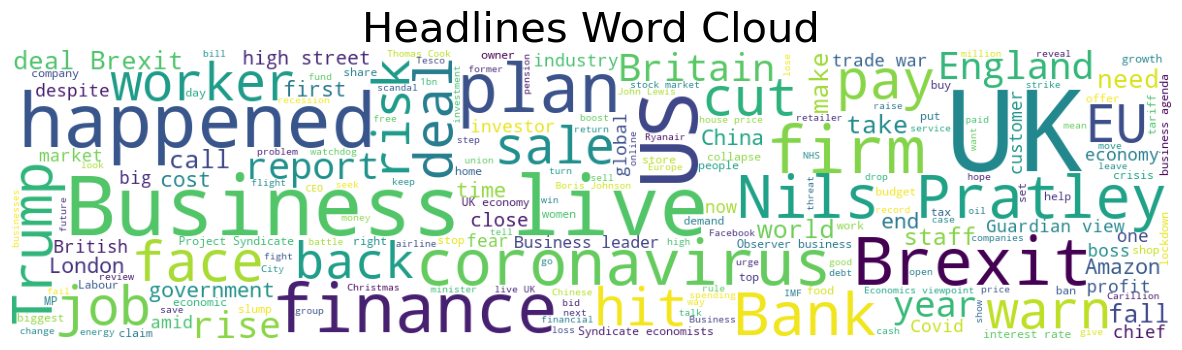

In [36]:
# Create a word cloud of the headlines
text = " ".join(h for h in data.Headlines)

# mask = np.array(Image.open('The Gardian Logo.jpg'))

# Define the stopwords
stopwords = set(STOPWORDS)
stopwords_addition = ['say', 'will', 'U', 'S', 'says', 'M', 'still', 'may', 'must', 'new']
for word in stopwords_addition:
    stopwords.add(word)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1200, height=300, min_font_size=8).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Headlines Word Cloud', fontsize=30)
plt.show()

In [37]:
# get frequency of words from word cloud for a specific word (for example, 'UK')
word_freq = wordcloud.words_
print(word_freq['UK'])
print(word_freq['US'])

1.0
0.4208566108007449


In [38]:
# Testing: get word count for a specific word (for example, 'UK')
WordCloud(stopwords=stopwords).process_text(text)['UK']

1611

In [39]:
# extract the year and month from the Time column
data['Year'] = pd.DatetimeIndex(data['Time']).year
data['Month'] = pd.DatetimeIndex(data['Time']).month
data['Year-Month'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)
data

,Time,Headlines,Year,Month,Year-Month
17799,2017-12-17,The Guardian view on Ryanair’s model: a union-...,2017,12,2017-12
17780,2017-12-17,Peter Preston on press and broadcasting \n\n\...,2017,12,2017-12
17781,2017-12-17,Why business could prosper under a Corbyn gove...,2017,12,2017-12
17782,2017-12-17,Youngest staff to be given UK workplace pensio...,2017,12,2017-12
17783,2017-12-17,Grogonomics \n\n\n This year has been about ...,2017,12,2017-12
...,...,...,...,...,...
17,2020-07-18,World Bank calls on creditors to cut poorest n...,2020,7,2020-7
18,2020-07-18,British Airways retires Boeing 747 fleet as Co...,2020,7,2020-7
19,2020-07-18,What will changes to England's lockdown rules ...,2020,7,2020-7
10,2020-07-18,St Mawes named UK’s top seaside resort in Whic...,2020,7,2020-7


In [40]:
# combine the headlines for each month
headline_by_month = map(lambda x: (x, " ".join(h for h in data[data['Year-Month'] == x].Headlines)), data['Year-Month'].unique())

In [41]:
# Count the keywords for each month headlines on specific words (for example, 'coronavirus', 'Brexit', 'Trump') 
word_list = ['coronavirus', 'Brexit', 'Trump']
df_wordcount = pd.DataFrame(columns=['Year-Month', 'Word', 'Count'])

for item in headline_by_month:
    for word in word_list:
        word_cloud = WordCloud(stopwords=stopwords).process_text(item[1])
        if word_cloud.get(word) is None:
            word_count = 0
        else:
            word_count = word_cloud[word]
        df_wordcount.loc[len(df_wordcount.index)] = [item[0], word, word_count]

df_wordcount

,Year-Month,Word,Count
0,2017-12,coronavirus,0
1,2017-12,Brexit,25
2,2017-12,Trump,3
3,2018-1,coronavirus,0
4,2018-1,Brexit,47
...,...,...,...
91,2020-6,Brexit,12
92,2020-6,Trump,7
93,2020-7,coronavirus,16
94,2020-7,Brexit,4


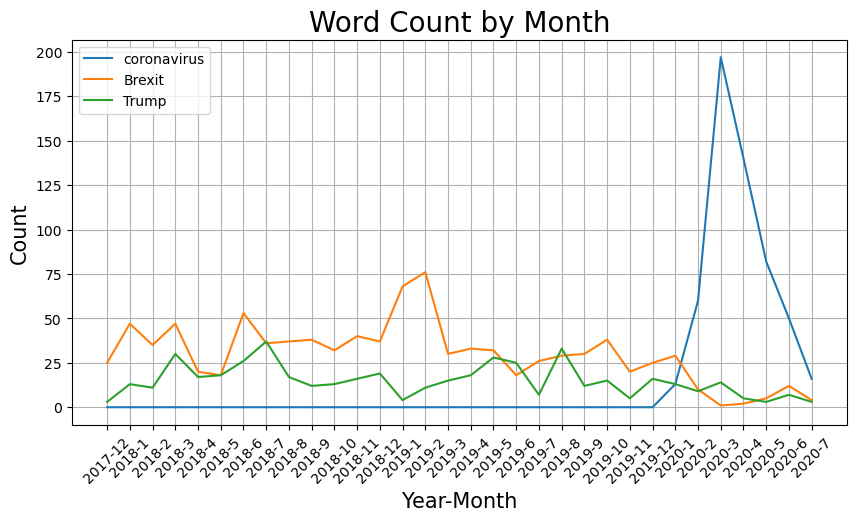

In [42]:
# plot word count by month on specific words
plt.figure(figsize=(10, 5))
for word in word_list:
    plt.plot(df_wordcount[df_wordcount['Word'] == word]['Year-Month'], df_wordcount[df_wordcount['Word'] == word]['Count'], label=word)
plt.title('Word Count by Month', fontsize=20)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [43]:
# get the word count for each headline
data['Headlines_word_count'] = data['Headlines'].apply(lambda x: len(x.split()))
data

,Time,Headlines,Year,Month,Year-Month,Headlines_word_count
17799,2017-12-17,The Guardian view on Ryanair’s model: a union-...,2017,12,2017-12,9
17780,2017-12-17,Peter Preston on press and broadcasting \n\n\...,2017,12,2017-12,17
17781,2017-12-17,Why business could prosper under a Corbyn gove...,2017,12,2017-12,8
17782,2017-12-17,Youngest staff to be given UK workplace pensio...,2017,12,2017-12,13
17783,2017-12-17,Grogonomics \n\n\n This year has been about ...,2017,12,2017-12,14
...,...,...,...,...,...,...
17,2020-07-18,World Bank calls on creditors to cut poorest n...,2020,7,2020-7,11
18,2020-07-18,British Airways retires Boeing 747 fleet as Co...,2020,7,2020-7,10
19,2020-07-18,What will changes to England's lockdown rules ...,2020,7,2020-7,10
10,2020-07-18,St Mawes named UK’s top seaside resort in Whic...,2020,7,2020-7,10


In [44]:
# Count the unique word count values in the Headlines_word_count column
data.groupby(['Headlines_word_count'])['Headlines_word_count'].nunique().count()

28

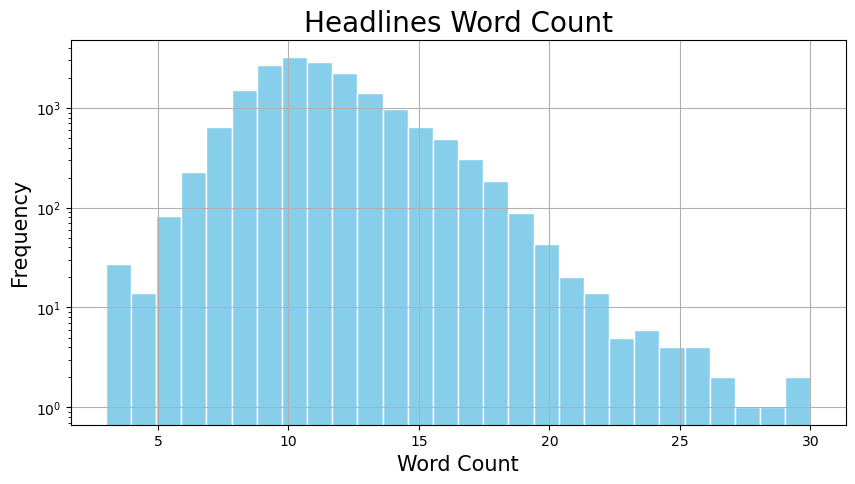

In [45]:
# plot the word count frequency of the headlines in histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Headlines_word_count'], bins=28, edgecolor='white', color='skyblue')
plt.title('Headlines Word Count', fontsize=20)
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yscale('log')
plt.grid(True)
plt.show()